In [1]:
import sys
sys.path.append('./../../')

In [10]:
import ikamoana.fisherieseffort.fisherieseffort as fe
import pandas as pd

filepath = "./../../data/fisheries_effort/skj_fisheries_data_2021_Nov17.txt"

In [19]:
fisheries_df = fe.readFile(filepath, header_position=0, columns_name=None)
fisheries_df = fe.removeEmptyEntries(fisheries_df,verbose=True)
fisheries_df = fe.removeNoCatchEntries(fisheries_df,verbose=True)
fisheries_dict = fe.separateFisheries(fisheries_df)
fisheries_dict[9] = fe.predictEffort(fisheries_dict[9])
fisheries_df_modified = pd.concat([value for value in fisheries_dict.values()])

Removed 17845 empty entries.
Number of empty entries per fishery :
 f         1    2   5    7     8     9   10  12
empty  12813  518  18  135  1933  2424   2   2

Removed 340907 entries without catch.
Number of entries without catch per fishery :
 f            1      2     3     4      5     6      7      8     9      10  \
no catch  19494  14085  6125  7349  17521  1189  12956  87199  5094  23734   

f             12     13    15  
no catch  110346  31246  4569  


In [4]:
print("NO EFFORT : ",end='')
print(len(fisheries_df[(fisheries_df['E']==0) & (fisheries_df['C']!=0)]))
print("NO CATCH : ",end='')
print(len(fisheries_df[(fisheries_df['E']!=0) & (fisheries_df['C']==0)]))
print("NO EFFORT AND NO CATCH : ",end='')
print(len(fisheries_df[(fisheries_df['C']==0) & (fisheries_df['E']==0)]))

NO EFFORT : 10780
NO CATCH : 0
NO EFFORT AND NO CATCH : 0


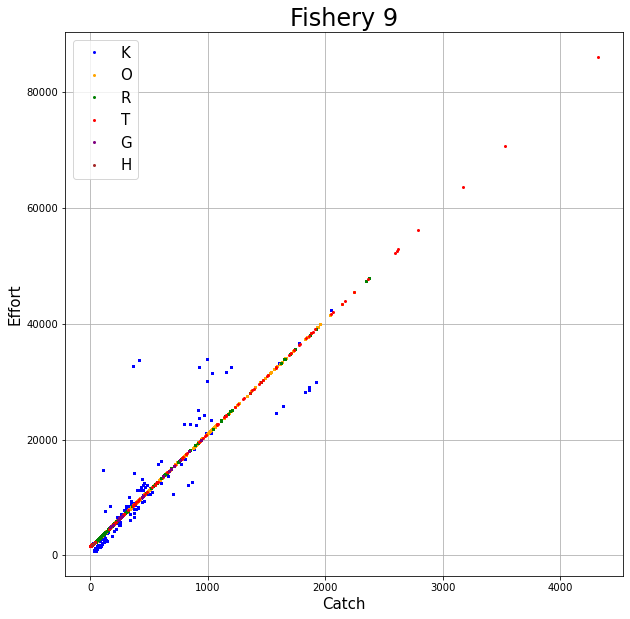

In [11]:
fe.plotByGear(fisheries_dict[9],title="Fishery 9")

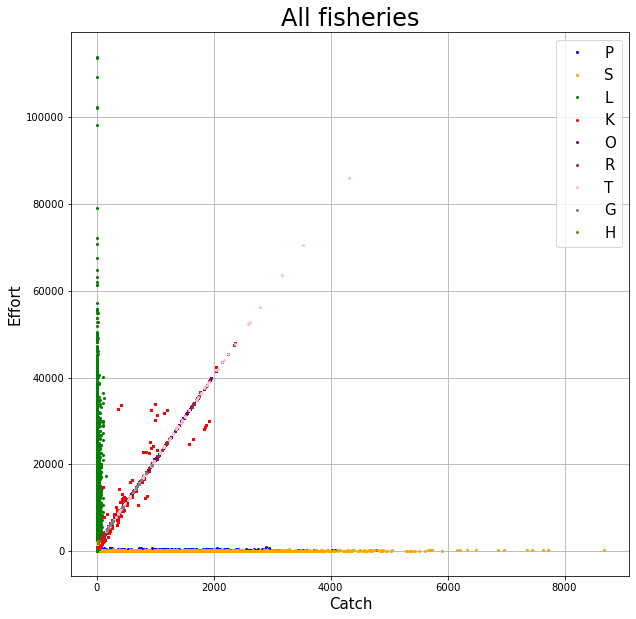

In [20]:
fe.plotByGear(fisheries_df_modified, title="All fisheries")

---
## Before Modifications

In [25]:
fisheries_df_no_modif = fe.readFile(filepath, header_position=0, columns_name=None)
fisheries_df_no_modif

,f,yr,mm,dd,gr,lat,lon,res,E,C
0,1,1950,1,15,P,46.5,150.5,1,1.0,0.047
1,1,1950,1,15,P,34.5,136.5,1,0.0,0.000
2,1,1950,1,15,P,34.5,138.5,1,0.0,0.000
3,1,1950,1,15,P,34.5,139.5,1,9.0,0.000
4,1,1950,1,15,P,33.5,133.5,1,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
1182367,15,2014,8,15,P,11.5,214.5,5,3.0,30.000
1182368,15,2014,8,15,P,10.5,229.5,5,3.0,9.000
1182369,15,2014,8,15,P,9.5,233.5,5,3.0,0.000
1182370,15,2014,8,15,P,2.5,239.5,5,3.0,39.000


## After Modifications

In [23]:
fisheries_df_modified

,f,yr,mm,dd,gr,lat,lon,res,E,C
0,1,1950,1,15,P,46.5,150.5,1,1.0,0.047
16,1,1950,1,15,P,29.5,131.5,1,2.0,3.539
32,1,1950,1,15,P,25.5,136.5,1,1.0,4.718
45,1,1950,1,15,P,21.5,141.5,1,1.0,4.010
46,1,1950,2,15,P,35.5,148.5,1,1.0,1.062
...,...,...,...,...,...,...,...,...,...,...
1182366,15,2014,7,15,P,0.5,235.5,5,3.0,12.000
1182367,15,2014,8,15,P,11.5,214.5,5,3.0,30.000
1182368,15,2014,8,15,P,10.5,229.5,5,3.0,9.000
1182370,15,2014,8,15,P,2.5,239.5,5,3.0,39.000


## Sums
>Changes are du to (1) removing the no catch entries with effort (2) computing the effort of no effort but catch entries.

In [35]:
print("EFFORT")
print("\tBEFORE :",fisheries_df_no_modif['E'].sum())
print("\tAFTER  :",fisheries_df_modified['E'].sum())

EFFORT
	BEFORE : 402336382.99999994
	AFTER  : 323937243.12848234


In [36]:
print("CATCH")
print("\tBEFORE :",fisheries_df_no_modif['C'].sum())
print("\tAFTER  :",fisheries_df_modified['C'].sum())

CATCH
	BEFORE : 62613572.641000025
	AFTER  : 62613572.64100002
